# Telecom Churn Case Study Upgrad DSC46

## Business Goal and Objective: 

>Analyse the customer-level data to identify customers which are at a high risk of churn (usage-based churn) and identify the main indicators of it. Retaining highly profitable customers is the main objective of the company hence correctly predicting customers who are likely to churn will be the focus of this case study to reduce the revenue leakage. 

>The `business objective` is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

## Model Framework: CRISP DM

>We will be using crisp-dm framework for this model and hence the steps that we will be performing are:- 

>- Business Understanding
>- Data Understanding 
>- Data Preparation 
>- Model Building 
>- Model Evaluation 

### Business Understanding 

#### High-value Churn:
>In the Indian and Southeast Asian markets, approximately 80% of revenue comes from the top 20% of customers (called high-value customers). Thus, if we can reduce the churn of high-value customers, we will be able to reduce significant revenue leakage.
In this project, we will define high-value customers based on usage and predict churn only on high-value customers.

#### Usage-based Churn: 
>Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

>A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In [1]:
# Importing the libraries 
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [2]:
# Reading the dataset
data = pd.read_csv("telecom_churn_data.csv")
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# Checking the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
#checking the shape of the dataset
data.shape

(99999, 226)

We have almost 100,000 rows including categorical and continuous variables. We will need to see it in more details

In [5]:
# Checking the description of features 
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [6]:
# Making a copy of the original dataset
data_original = data.copy()

## Data Preparation
<hr/>

There are three phases of customer lifecycle :

>- The `good` phase: In this phase, the customer is happy with the service and behaves as usual.

>- The `action` phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

>- The `churn` phase: In this phase, the customer is said to have churned. 

***We will define churn based on the `churn` phase.*** 
 
>As we are working over a four-month window, the first two months are the `good` phase, the third month is the `action` phase, while the fourth month is the `churn` phase.

### Deriving New Features

In [7]:
# Let us get the columns for recharge amount
amt_recharge =  data.columns[data.columns.str.contains('rech_amt|rech_data')]
print("Total Recharge Columns: ", len(amt_recharge))
print("\n",amt_recharge)


Total Recharge Columns:  24

 Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


<span style='color:red'>***The information we can get from the above list is:-***</span>
- Total recharge amount
- Total recharge amount for data
- Maximum recharge amount 
- Last date of recharging the data
- Average recharge amount of data
- Maximum recharge for data|

In [8]:
# Now let us check the missing values percentages of the recharge columns
data_rech_null = round((data.loc[:,amt_recharge].isnull().sum()/len(data.index))*100,3)
df = pd.DataFrame(data_rech_null)
df.rename(columns={0:'Null_Percentage'}, inplace=True)
df = pd.DataFrame(df.Null_Percentage)
display(df)

,Null_Percentage
total_rech_amt_6,0.000
total_rech_amt_7,0.000
total_rech_amt_8,0.000
total_rech_amt_9,0.000
max_rech_amt_6,0.000
max_rech_amt_7,0.000
max_rech_amt_8,0.000
max_rech_amt_9,0.000
date_of_last_rech_data_6,74.847
date_of_last_rech_data_7,74.429


We can see from above data that 16 columns related to recharge have almost ***74 - 75%*** of their data missing. We will need to treat this. 

In [9]:
# Describing the recharge columns once
data.loc[:,amt_recharge].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


> We will be creating a new feature `total_rech_amt_data` which is the to capture the amount utilized by the customers on data using the `total_rech_amt` and `av_rech_amt_data` colums. 

> Also in order to treat the missing values in these columns, we will be replacing the ***NaN*** values with ***0*** considering the fact that the missing values represent the absence of any recharge done by the customer. 

We have almost 100,000 rows including categorical and continuous variables. We will need to see it in more details

In [10]:
#Replacing the missing values
data['total_rech_data_6'] = data['total_rech_data_6'].replace(np.NaN,0.0)
data['total_rech_data_7'] = data['total_rech_data_7'].replace(np.NaN,0.0)
data['total_rech_data_8'] = data['total_rech_data_8'].replace(np.NaN,0.0)

In [11]:
#Replacing the missing values of the av_rech_amt_data columns
data['av_rech_amt_data_6'] = data['av_rech_amt_data_6'].replace(np.NaN,0.0)
data['av_rech_amt_data_7'] = data['av_rech_amt_data_7'].replace(np.NaN,0.0)
data['av_rech_amt_data_8'] = data['av_rech_amt_data_8'].replace(np.NaN,0.0)

In [12]:
# Now let us add the new column total_rech_amt_data for calculating High Value customer process
data['total_rech_amt_data_6'] = data.av_rech_amt_data_6 * data.total_rech_data_6
data['total_rech_amt_data_7'] = data.av_rech_amt_data_7 * data.total_rech_data_7
data['total_rech_amt_data_8'] = data.av_rech_amt_data_8 * data.total_rech_data_8

***Now we need to calculate the average of total recharge data amount for the months of June and July (6 & 7) which are considered as Good Phase Months***

In [13]:
good_phase_avg_rech_data = (data.total_rech_amt_6 + data.total_rech_amt_data_6 \
                             + data.total_rech_amt_7+ data.total_rech_amt_data_7)/2

#### Defining High Value Customers: 
>Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [14]:
# calculating the 70 percentile of the Good_phase_avg_rech_data
good_phase_perct = np.percentile(good_phase_avg_rech_data, 70.0)
print(f'70th Percentile of the recharge amount is : {good_phase_perct}')

# Keep high value customer data
data = data[good_phase_avg_rech_data >= good_phase_perct]

print(f'Shape of the new dataset: {data.shape}')

70th Percentile of the recharge amount is : 478.0
Shape of the new dataset: (30001, 229)


### Tag churners and remove attributes of the churn phase

>Now we will tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we will be using to tag churners are:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

**After tagging churners, we need to remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).**

In [15]:
# defining all the columns based on which churn will be decided.
churn_cols_9 = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']

In [16]:
# Checking the NA/Null values are present or Not
df = 100*data.loc[:,churn_cols_9].isnull().sum()/len(data)
df = pd.DataFrame(df)
df.rename(columns={0:'Null_Percentage'}, inplace=True)
df = pd.DataFrame(df.Null_Percentage)
display(df)

,Null_Percentage
total_ic_mou_9,0.0
total_og_mou_9,0.0
vol_2g_mb_9,0.0
vol_3g_mb_9,0.0


In [17]:
# Initially set all the values as 0
data['churn']= 0

In [18]:
#is_churned boolean flag for customers where above values are zero
is_churned = (data.total_ic_mou_9 == 0) & (data.total_og_mou_9 == 0) & \
             (data.vol_2g_mb_9 ==0) & (data.vol_3g_mb_9 ==0)

In [19]:
# setting all values having is_churned = True condition as 1
data.loc[is_churned,'churn']=1

In [20]:
# Now let us check what's the % of churned customers
print(round(100*data.churn.sum()/len(data),3),"%")

8.136 %


In [21]:
data.churn.value_counts(normalize=True)

0    0.918636
1    0.081364
Name: churn, dtype: float64

**After tagging churners, we will now remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)**

In [22]:
churn_month_columns =  data.columns[data.columns.str.contains('_9')]

In [23]:
# drop all columns corresponding to the churn phase
data.drop(churn_month_columns,axis=1,inplace=True)

In [24]:
#checking the shape of the new dataset
data.shape

(30001, 176)

## Data cleaning and EDA
<hr/>

- Missing Value Treatment
- Data Cleaning
- Data visualization

In [25]:
# Checking for missing values
null_val = round(data.isna().sum() / len(data) * 100, 3).sort_values(ascending=False)
print(null_val)

count_rech_2g_8             46.825
night_pck_user_8            46.825
fb_user_8                   46.825
arpu_3g_8                   46.825
date_of_last_rech_data_8    46.825
max_rech_data_8             46.825
arpu_2g_8                   46.825
count_rech_3g_8             46.825
max_rech_data_6             44.149
count_rech_2g_6             44.149
date_of_last_rech_data_6    44.149
fb_user_6                   44.149
count_rech_3g_6             44.149
arpu_2g_6                   44.149
arpu_3g_6                   44.149
night_pck_user_6            44.149
night_pck_user_7            43.145
fb_user_7                   43.145
date_of_last_rech_data_7    43.145
max_rech_data_7             43.145
count_rech_2g_7             43.145
count_rech_3g_7             43.145
arpu_2g_7                   43.145
arpu_3g_7                   43.145
loc_ic_mou_8                 3.913
std_og_t2c_mou_8             3.913
std_og_mou_8                 3.913
isd_og_mou_8                 3.913
spl_og_mou_8        

In [26]:
# Select columns with more than 40% values missing
drop_missing = null_val[null_val > 40].index.tolist()
drop_missing

['count_rech_2g_8',
 'night_pck_user_8',
 'fb_user_8',
 'arpu_3g_8',
 'date_of_last_rech_data_8',
 'max_rech_data_8',
 'arpu_2g_8',
 'count_rech_3g_8',
 'max_rech_data_6',
 'count_rech_2g_6',
 'date_of_last_rech_data_6',
 'fb_user_6',
 'count_rech_3g_6',
 'arpu_2g_6',
 'arpu_3g_6',
 'night_pck_user_6',
 'night_pck_user_7',
 'fb_user_7',
 'date_of_last_rech_data_7',
 'max_rech_data_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'arpu_2g_7',
 'arpu_3g_7']

In [27]:
# We will drop the columns with >40% missing values
data.drop(drop_missing, axis=1, inplace=True)
data.shape

(30001, 152)

In [28]:
# rechecking missing values 
round(data.isna().sum() / len(data) * 100, 3).sort_values(ascending=False)

loc_ic_mou_8             3.913
loc_og_t2t_mou_8         3.913
loc_og_t2f_mou_8         3.913
loc_og_t2c_mou_8         3.913
loc_og_mou_8             3.913
std_og_t2t_mou_8         3.913
std_og_t2m_mou_8         3.913
std_og_t2f_mou_8         3.913
std_og_t2c_mou_8         3.913
std_og_mou_8             3.913
isd_og_mou_8             3.913
spl_og_mou_8             3.913
loc_ic_t2t_mou_8         3.913
loc_ic_t2m_mou_8         3.913
loc_ic_t2f_mou_8         3.913
std_ic_t2t_mou_8         3.913
std_ic_t2m_mou_8         3.913
std_ic_t2f_mou_8         3.913
std_ic_t2o_mou_8         3.913
std_ic_mou_8             3.913
spl_ic_mou_8             3.913
isd_ic_mou_8             3.913
ic_others_8              3.913
loc_og_t2m_mou_8         3.913
og_others_8              3.913
onnet_mou_8              3.913
offnet_mou_8             3.913
roam_og_mou_8            3.913
roam_ic_mou_8            3.913
date_of_last_rech_8      1.943
spl_og_mou_6             1.817
std_og_mou_6             1.817
std_ic_t

> Since the rest of the columns have less than 5% of the data missing we will just drop the rows with the missing values 

In [29]:
# Droping the rows with the missing values
for i in data.columns:
    data = data[~data[i].isna()]
    
# Re-check missing values
round(data.isna().sum() / len(data) * 100, 3).sort_values(ascending=False)

mobile_number            0.0
total_rech_num_6         0.0
spl_ic_mou_8             0.0
isd_ic_mou_6             0.0
isd_ic_mou_7             0.0
isd_ic_mou_8             0.0
ic_others_6              0.0
ic_others_7              0.0
ic_others_8              0.0
total_rech_num_7         0.0
circle_id                0.0
total_rech_num_8         0.0
total_rech_amt_6         0.0
total_rech_amt_7         0.0
total_rech_amt_8         0.0
max_rech_amt_6           0.0
max_rech_amt_7           0.0
max_rech_amt_8           0.0
spl_ic_mou_7             0.0
spl_ic_mou_6             0.0
total_ic_mou_8           0.0
total_ic_mou_7           0.0
std_ic_t2t_mou_7         0.0
std_ic_t2t_mou_8         0.0
std_ic_t2m_mou_6         0.0
std_ic_t2m_mou_7         0.0
std_ic_t2m_mou_8         0.0
std_ic_t2f_mou_6         0.0
std_ic_t2f_mou_7         0.0
std_ic_t2f_mou_8         0.0
std_ic_t2o_mou_6         0.0
std_ic_t2o_mou_7         0.0
std_ic_t2o_mou_8         0.0
std_ic_mou_6             0.0
std_ic_mou_7  

In [30]:
# The date columns don't add any value excpet for marking the last day of the period
# so we will drop them

#getting all the date columns
date_cols = [i for i in data.columns if 'date' in i]

#droping all the date columns
data.drop(date_cols, axis=1, inplace=True)

In [31]:
#checking the dataset once again
print(data.shape)
display(data)

(28163, 146)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,0
21,7002124215,109,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.00,0.00,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,0.0,0.0,0.0,763.29,934.69,938.79,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,860.34,1028.

> We can see from this dataframe that a few of the columns, like `circle_id` have only $1$ value. These kind of features suggest no variance and hence wont be contributing anything to our target variable. Hence we will be droping these columns 

In [32]:
#creating the list of columns with only 1 unique value
single_uni = []

for i in data.columns:
    if data[f'{i}'].nunique() == 1:
        single_uni.append(i)

single_uni

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [33]:
# Now we will just drop these single value columns
data.drop(single_uni, axis=1, inplace=True)
data.shape

(28163, 136)

In [34]:
# we will also drop the column 'mobile_number' as it does not add any value to our analysis 
data.drop('mobile_number', axis=1, inplace=True)
data.head(20)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,0.0,0.0,0.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0.0,354.0,207.0,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.00,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,763.29,934.69,938.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,30,20,50,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,

In [35]:
# Let us check the correlation between the variables

corr = data.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

arpu_7                 arpu_6                0.728704
arpu_8                 arpu_6                0.671437
                       arpu_7                0.778413
onnet_mou_7            onnet_mou_6           0.770224
onnet_mou_8            onnet_mou_6           0.646114
                       onnet_mou_7           0.811314
offnet_mou_7           offnet_mou_6          0.755880
offnet_mou_8           offnet_mou_6          0.605742
                       offnet_mou_7          0.772001
roam_ic_mou_8          roam_ic_mou_7         0.618233
roam_og_mou_6          roam_ic_mou_6         0.647696
roam_og_mou_8          roam_og_mou_7         0.605246
loc_og_t2t_mou_7       loc_og_t2t_mou_6      0.801091
loc_og_t2t_mou_8       loc_og_t2t_mou_6      0.708473
                       loc_og_t2t_mou_7      0.836495
loc_og_t2m_mou_7       loc_og_t2m_mou_6      0.790918
loc_og_t2m_mou_8       loc_og_t2m_mou_6      0.698190
                       loc_og_t2m_mou_7      0.826281
loc_og_t2f_mou_7       loc_o

In [36]:
# List of all the columns that are explained well by other columns and high correlations
corr_col = ['loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 
                 'std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 
                 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 
                 'std_ic_t2m_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 
                 'total_rech_amt_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']

# Drop the high corr columns
data.drop(corr_col, axis=1, inplace=True)
data.shape

(28163, 96)

In [37]:
corr = data.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

arpu_7                 arpu_6                0.728704
arpu_8                 arpu_6                0.671437
                       arpu_7                0.778413
onnet_mou_7            onnet_mou_6           0.770224
onnet_mou_8            onnet_mou_6           0.646114
                       onnet_mou_7           0.811314
offnet_mou_7           offnet_mou_6          0.755880
offnet_mou_8           offnet_mou_6          0.605742
                       offnet_mou_7          0.772001
roam_ic_mou_8          roam_ic_mou_7         0.618233
roam_og_mou_6          roam_ic_mou_6         0.647696
roam_og_mou_8          roam_og_mou_7         0.605246
loc_og_mou_7           loc_og_mou_6          0.813507
loc_og_mou_8           loc_og_mou_6          0.737378
                       loc_og_mou_7          0.844488
std_og_t2f_mou_7       std_og_t2f_mou_6      0.719148
std_og_t2f_mou_8       std_og_t2f_mou_6      0.650356
                       std_og_t2f_mou_7      0.788976
std_og_mou_6           onnet

In [38]:
#checking the data
display(data.head())

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,0.0,0.0,0.00,422.16,533.91,255.79,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,427.88,355.23,188.04,36.89,11.83,30.39,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,0.0,0.0,0.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,81.43,23.83,15.79,0.00,0.58,0.10,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.0,2.0,3.0,0.0,177.0,69.0,0.00,356.00,0.03,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0.0,354.0,207.0,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,97.04,94.09,129.74,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,125.33,87.68,159.11,14.06,5.98,0.18,0.00,0.00,0.00,81.76,44.21,101.93,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,50,50,50,30,20,50,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.0,0.01,0.00,0.1,0.0,17.71,0.0,0.0,0.0,116.63,174.41,224.21,0.51,0.00,13.38,0.00,0.00,0.00,2.94,14.89,57.29,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06,3,5,4,0,179,179,0,179,0,0.0,2.0,2.0,0.0,356.0,270.0,0.00,0.48,0.01,0,0,0,0,0,0,0,2,1,0,0,1,604,40.45,51.86,0.00,0.0,0.0,712.0,540.0,0
33,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.56,0.0,0.0,0.0,3.48,0.88,40.54,0.00,2.91,0.05,0.23,0.96,0.13,3.18,5.66,1.04,0.00,0.0,0.0,0.00,0.00,0.00,1.23,0.65,0.20,7,14,1,252,1255,455,252,0,455,5.0,8.0,1.0,1057.0,2553.0,455.0,87.05,57.76,7.97,0,0,0,0,0,0,4,5,1,1,3,0,1328,358.10,2706.83,1714.67,0.0,5285.0,20424.0,455.0,0


#### Creating New Features
> we will be creating a few new features which will be able to explain the data better and reduce multi-colinearity

In [39]:
# Creating a new column with combined mou instead of offnet and onnet for each month

data['total_mou_6'] = data['onnet_mou_6'] + data['offnet_mou_6']
data['total_mou_7'] = data['onnet_mou_7'] + data['offnet_mou_7']
data['total_mou_8'] = data['onnet_mou_8'] + data['offnet_mou_8']

# Dropping the redundant columns
data.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)

print(data.shape)
data.head()

(28163, 93)


,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn,total_mou_6,total_mou_7,total_mou_8
7,1069.180,1349.850,3171.480,16.23,33.49,31.64,23.74,12.59,38.06,0.0,0.0,0.00,422.16,533.91,255.79,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,427.88,355.23,188.04,36.89,11.83,30.39,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,0.0,0.0,0.0,1,511.27,621.84,378.20
8,378.721,492.223,137.362,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,81.43,23.83,15.79,0.00,0.58,0.10,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.0,2.0,3.0,0.0,177.0,69.0,0.00,356.00,0.03,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0.0,354.0,207.0,0,508.35,431.66,171.56
21,514.453,597.753,637.760,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,97.04,94.09,129.74,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,125.33,87.68,159.11,14.06,5.98,0.18,0.00,0.00,0.00,81.76,44.21,101.93,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,50,50,50,30,20,50,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,860.34,1028.79,1068.53
23,74.350,193.897,366.966,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.0,0.01,0.00,0.1,0.0,17.71,0.0,0.0,0.0,116.63,174.41,224.21,0.51,0.00,13.38,0.00,0.00,0.00,2.94,14.89,57.29,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06,3,5,4,0,179,179,0,179,0,0.0,2.0,2.0,0.0,356.0,270.0,0.00,0.48,0.01,0,0,0,0,0,0,0,2,1,0,0,1,604,40.45,51.86,0.00,0.0,0.0,712.0,540.0,0,134.37,140.02,239.47
33,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.56,0.0,0.0,0.0,3.48,0.88,40.54,0.00,2.91,0.05,0.23,0.96,0.13,3.18,5.66,1.04,0.00,0.0,0.0,0.00,0.00,0.00,1.23,0.65,0.20,7,14,1,252,1255,455,252,0,455,5.0,8.0,1.0,1057.0,2553.0,455.0,87.05,57.76,7.97,0,0,0,0,0,0,4,5,1,1,3,0,1328,358.10,2706.83,1714.67,0.0,5285.0,20424.0,455.0,0,0.00,0.00,0.00


> For the other columns we will not merge them into one, instead we will create new features that will each account for the `good` phase by averaging out the values for the 6th and the 7th month respectively

In [40]:
# creating a seperate column list for 6th and 7th month
Combo_6_7 = [i[:-2] for i in data.columns if '6' in i or '7' in i]

# Creating a new feature for the good phase and dropping the redundant ones
for i in set(Combo_6_7):
    data[f'gd_ph_{i}'] = ( data[f'{i}_6'] + data[f'{i}_7'] ) / 2
    data.drop([f'{i}_6', f'{i}_7'], axis=1, inplace=True)
        
data.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_8,churn,total_mou_8,gd_ph_loc_og_t2c_mou,gd_ph_og_others,gd_ph_last_day_rch_amt,gd_ph_roam_og_mou,gd_ph_vol_2g_mb,gd_ph_total_rech_num,gd_ph_std_og_t2f_mou,gd_ph_monthly_3g,gd_ph_std_ic_t2t_mou,gd_ph_std_ic_t2f_mou,gd_ph_ic_others,gd_ph_av_rech_amt_data,gd_ph_monthly_2g,gd_ph_sachet_2g,gd_ph_total_rech_amt_data,gd_ph_spl_og_mou,gd_ph_loc_og_mou,gd_ph_max_rech_amt,gd_ph_total_rech_data,gd_ph_loc_ic_mou,gd_ph_isd_ic_mou,gd_ph_spl_ic_mou,gd_ph_std_og_mou,gd_ph_total_mou,gd_ph_roam_ic_mou,gd_ph_sachet_3g,gd_ph_isd_og_mou,gd_ph_std_ic_mou,gd_ph_arpu
7,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.0,0.0,0.00,0,0,0,0,802,57.74,19.38,18.74,0.0,0.0,1,378.20,0.0,0.0,0.0,18.165,0.000,5.0,13.37,0.0,24.360,43.215,15.465,0.0,0.0,0.0,0.0,2.25,478.035,1185.0,0.0,391.555,8.295,0.105,68.000,566.555,24.86,0.0,0.090,176.810,1209.5150
8,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,3.0,69.0,0.03,0,3,0,0,315,21.03,910.65,122.16,0.0,207.0,0,171.56,0.0,0.0,25.0,0.000,178.000,20.0,0.00,0.0,0.290,0.000,0.000,88.5,0.5,0.5,177.0,0.00,333.135,122.0,1.0,52.630,0.000,0.000,136.870,470.005,0.00,0.0,0.000,13.545,435.4720
21,637.760,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.0,0.0,0.00,0,0,0,0,720,0.00,0.00,0.00,0.0,0.0,0,1068.53,0.0,0.0,25.0,0.000,0.000,24.0,0.00,0.0,10.020,0.000,0.000,0.0,0.0,0.0,0.0,0.00,95.565,50.0,0.0,106.505,0.000,0.000,848.990,944.565,0.00,0.0,0.000,62.985,556.1030
23,366.966,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,2.0,270.0,0.01,0,0,1,1,604,40.45,51.86,0.00,0.0,540.0,0,239.47,0.0,0.0,89.5,0.000,0.240,4.0,0.00,1.0,0.255,0.000,2.675,178.0,0.0,0.0,356.0,0.05,132.795,89.5,1.0,145.520,14.115,0.000,4.355,137.195,0.00,0.0,0.005,8.915,134.1235
33,409.230,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,40.54,0.05,0.13,1.04,0.0,0.00,0.20,1,455,455,1.0,455.0,7.97,0,0,1,0,1328,358.10,2706.83,1714.67,0.0,455.0,0,0.00,0.0,0.0,126.0,0.000,72.405,10.5,0.00,4.5,1.455,0.595,0.940,1805.0,0.0,0.0,12854.5,0.00,0.000,753.5,6.5,2.180,0.000,0.000,0.000,0.000,0.00,2.0,0.000,4.420,1669.9265


In [41]:
data.shape

(28163, 64)

> `vbc` columns don't have the **number of month** as a suffix so it was not featurized previously and now we will do it separately

In [42]:
# Create new column
data['gd_ph_vbc_3g'] = ( data['jul_vbc_3g'] + data['jun_vbc_3g'] ) / 2

# Drop redundant column
data.drop(['jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], axis=1, inplace=True)

# Renaming the august column for vbc to vbc_3g_8
data['vbc_3g_8'] = data['aug_vbc_3g']
data.drop('aug_vbc_3g', axis=1, inplace=True)

data.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,total_rech_amt_data_8,churn,total_mou_8,gd_ph_loc_og_t2c_mou,gd_ph_og_others,gd_ph_last_day_rch_amt,gd_ph_roam_og_mou,gd_ph_vol_2g_mb,gd_ph_total_rech_num,gd_ph_std_og_t2f_mou,gd_ph_monthly_3g,gd_ph_std_ic_t2t_mou,gd_ph_std_ic_t2f_mou,gd_ph_ic_others,gd_ph_av_rech_amt_data,gd_ph_monthly_2g,gd_ph_sachet_2g,gd_ph_total_rech_amt_data,gd_ph_spl_og_mou,gd_ph_loc_og_mou,gd_ph_max_rech_amt,gd_ph_total_rech_data,gd_ph_loc_ic_mou,gd_ph_isd_ic_mou,gd_ph_spl_ic_mou,gd_ph_std_og_mou,gd_ph_total_mou,gd_ph_roam_ic_mou,gd_ph_sachet_3g,gd_ph_isd_og_mou,gd_ph_std_ic_mou,gd_ph_arpu,gd_ph_vbc_3g,vbc_3g_8
7,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.0,0.0,0.00,0,0,0,0,802,0.0,1,378.20,0.0,0.0,0.0,18.165,0.000,5.0,13.37,0.0,24.360,43.215,15.465,0.0,0.0,0.0,0.0,2.25,478.035,1185.0,0.0,391.555,8.295,0.105,68.000,566.555,24.86,0.0,0.090,176.810,1209.5150,19.060,57.74
8,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,3.0,69.0,0.03,0,3,0,0,315,207.0,0,171.56,0.0,0.0,25.0,0.000,178.000,20.0,0.00,0.0,0.290,0.000,0.000,88.5,0.5,0.5,177.0,0.00,333.135,122.0,1.0,52.630,0.000,0.000,136.870,470.005,0.00,0.0,0.000,13.545,435.4720,516.405,21.03
21,637.760,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.0,0.0,0.00,0,0,0,0,720,0.0,0,1068.53,0.0,0.0,25.0,0.000,0.000,24.0,0.00,0.0,10.020,0.000,0.000,0.0,0.0,0.0,0.0,0.00,95.565,50.0,0.0,106.505,0.000,0.000,848.990,944.565,0.00,0.0,0.000,62.985,556.1030,0.000,0.00
23,366.966,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,2.0,270.0,0.01,0,0,1,1,604,540.0,0,239.47,0.0,0.0,89.5,0.000,0.240,4.0,0.00,1.0,0.255,0.000,2.675,178.0,0.0,0.0,356.0,0.05,132.795,89.5,1.0,145.520,14.115,0.000,4.355,137.195,0.00,0.0,0.005,8.915,134.1235,25.930,40.45
33,409.230,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,40.54,0.05,0.13,1.04,0.0,0.00,0.20,1,455,455,1.0,455.0,7.97,0,0,1,0,1328,455.0,0,0.00,0.0,0.0,126.0,0.000,72.405,10.5,0.00,4.5,1.455,0.595,0.940,1805.0,0.0,0.0,12854.5,0.00,0.000,753.5,6.5,2.180,0.000,0.000,0.000,0.000,0.00,2.0,0.000,4.420,1669.9265,2210.750,358.10


In [43]:
data.shape

(28163, 62)

In [44]:
# Reseting the index 
data.reset_index(inplace=True, drop=True)
data.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,total_rech_amt_data_8,churn,total_mou_8,gd_ph_loc_og_t2c_mou,gd_ph_og_others,gd_ph_last_day_rch_amt,gd_ph_roam_og_mou,gd_ph_vol_2g_mb,gd_ph_total_rech_num,gd_ph_std_og_t2f_mou,gd_ph_monthly_3g,gd_ph_std_ic_t2t_mou,gd_ph_std_ic_t2f_mou,gd_ph_ic_others,gd_ph_av_rech_amt_data,gd_ph_monthly_2g,gd_ph_sachet_2g,gd_ph_total_rech_amt_data,gd_ph_spl_og_mou,gd_ph_loc_og_mou,gd_ph_max_rech_amt,gd_ph_total_rech_data,gd_ph_loc_ic_mou,gd_ph_isd_ic_mou,gd_ph_spl_ic_mou,gd_ph_std_og_mou,gd_ph_total_mou,gd_ph_roam_ic_mou,gd_ph_sachet_3g,gd_ph_isd_og_mou,gd_ph_std_ic_mou,gd_ph_arpu,gd_ph_vbc_3g,vbc_3g_8
0,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.0,0.0,0.00,0,0,0,0,802,0.0,1,378.20,0.0,0.0,0.0,18.165,0.000,5.0,13.37,0.0,24.360,43.215,15.465,0.0,0.0,0.0,0.0,2.25,478.035,1185.0,0.0,391.555,8.295,0.105,68.000,566.555,24.86,0.0,0.090,176.810,1209.5150,19.060,57.74
1,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,3.0,69.0,0.03,0,3,0,0,315,207.0,0,171.56,0.0,0.0,25.0,0.000,178.000,20.0,0.00,0.0,0.290,0.000,0.000,88.5,0.5,0.5,177.0,0.00,333.135,122.0,1.0,52.630,0.000,0.000,136.870,470.005,0.00,0.0,0.000,13.545,435.4720,516.405,21.03
2,637.760,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.0,0.0,0.00,0,0,0,0,720,0.0,0,1068.53,0.0,0.0,25.0,0.000,0.000,24.0,0.00,0.0,10.020,0.000,0.000,0.0,0.0,0.0,0.0,0.00,95.565,50.0,0.0,106.505,0.000,0.000,848.990,944.565,0.00,0.0,0.000,62.985,556.1030,0.000,0.00
3,366.966,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,2.0,270.0,0.01,0,0,1,1,604,540.0,0,239.47,0.0,0.0,89.5,0.000,0.240,4.0,0.00,1.0,0.255,0.000,2.675,178.0,0.0,0.0,356.0,0.05,132.795,89.5,1.0,145.520,14.115,0.000,4.355,137.195,0.00,0.0,0.005,8.915,134.1235,25.930,40.45
4,409.230,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,40.54,0.05,0.13,1.04,0.0,0.00,0.20,1,455,455,1.0,455.0,7.97,0,0,1,0,1328,455.0,0,0.00,0.0,0.0,126.0,0.000,72.405,10.5,0.00,4.5,1.455,0.595,0.940,1805.0,0.0,0.0,12854.5,0.00,0.000,753.5,6.5,2.180,0.000,0.000,0.000,0.000,0.00,2.0,0.000,4.420,1669.9265,2210.750,358.10


In [45]:
data.describe()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,total_rech_amt_data_8,churn,total_mou_8,gd_ph_loc_og_t2c_mou,gd_ph_og_others,gd_ph_last_day_rch_amt,gd_ph_roam_og_mou,gd_ph_vol_2g_mb,gd_ph_total_rech_num,gd_ph_std_og_t2f_mou,gd_ph_monthly_3g,gd_ph_std_ic_t2t_mou,gd_ph_std_ic_t2f_mou,gd_ph_ic_others,gd_ph_av_rech_amt_data,gd_ph_monthly_2g,gd_ph_sachet_2g,gd_ph_total_rech_amt_data,gd_ph_spl_og_mou,gd_ph_loc_og_mou,gd_ph_max_rech_amt,gd_ph_total_rech_data,gd_ph_loc_ic_mou,gd_ph_isd_ic_mou,gd_ph_spl_ic_mou,gd_ph_std_og_mou,gd_ph_total_mou,gd_ph_roam_ic_mou,gd_ph_sachet_3g,gd_ph_isd_og_mou,gd_ph_std_ic_mou,gd_ph_arpu,gd_ph_vbc_3g,vbc_3g_8
count,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000
mean,528.992500,13.145865,20.926258,1.789363,247.845569,1.646062,322.121339,1.989213,6.889342,0.061151,235.639315,14.625113,2.692254,46.761176,0.027889,11.437856,1.291328,10.435323,164.597131,94.779640,1.678727,123.159975,109.831129,0.160210,1.100771,0.209459,0.208287,1233.456627,474.696750,0.054611,597.378280,1.766261,0.359434,98.522885,23.757457,127.717157,12.026489,1.840391,0.213773,15.535415,2.835280,1.371220,132.322671,0.183397,1.154618,489.136118,6.610121,263.016895,167.748198,1.768988,241.031533,11.458002,0.041413,362.567597,656.094111,14.632102,0.217200,2.047679,49.261396,567.163074,169.310408,173.745705
std,500.479643,76.125433,107.722393,7.390599,367.353912,11.126142,615.275135,45.888765,20.813297,3.421503,313.175366,73.017056,20.476161,142.430462,0.113430,72.276371,13.164084,9.288002,169.014286,141.789453,3.037588,191.189609,317.809110,0.413067,2.573361,0.619138,1.116503,962.975074,1653.777311,0.227223,706.447419,6.536779,2.533710,108.064480,94.459260,304.044111,8.650631,11.647474,0.565446,76.790814,18.312495,14.081974,176.195155,0.392058,2.435548,1248.961268,17.610173,361.575126,148.011960,2.725981,303.003271,74.792010,0.154356,586.639498,657.870003,66.404361,0.940707,45.536401,135.463961,431.807280,395.513994,424.621028
min,-345.129000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-451.713500,0.000000,0.000000
25%,258.075500,0.000000,0.000000,0.000000,31.410000,0.000000,0.000000,0.000000,0.000000,0.000000,51.185000,0.000000,0.000000,0.940000,0.000000,0.000000,0.000000,4.000000,67.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,472.000000,0.000000,0.000000,117.170000,0.000000,0.000000,30.000000,0.000000,0.000000,6.500000,0.000000,0.000000,0.000000,0.000000,0.

#### Observation Summary: 
> * We can see that almost every column has some outliers. While most of them have 0 as a value which suggest that the services were not used but some are actual outliers. 

> * We will be capping these features to deal with the outliers since we don't have actual business experts to check the factuality of the data.

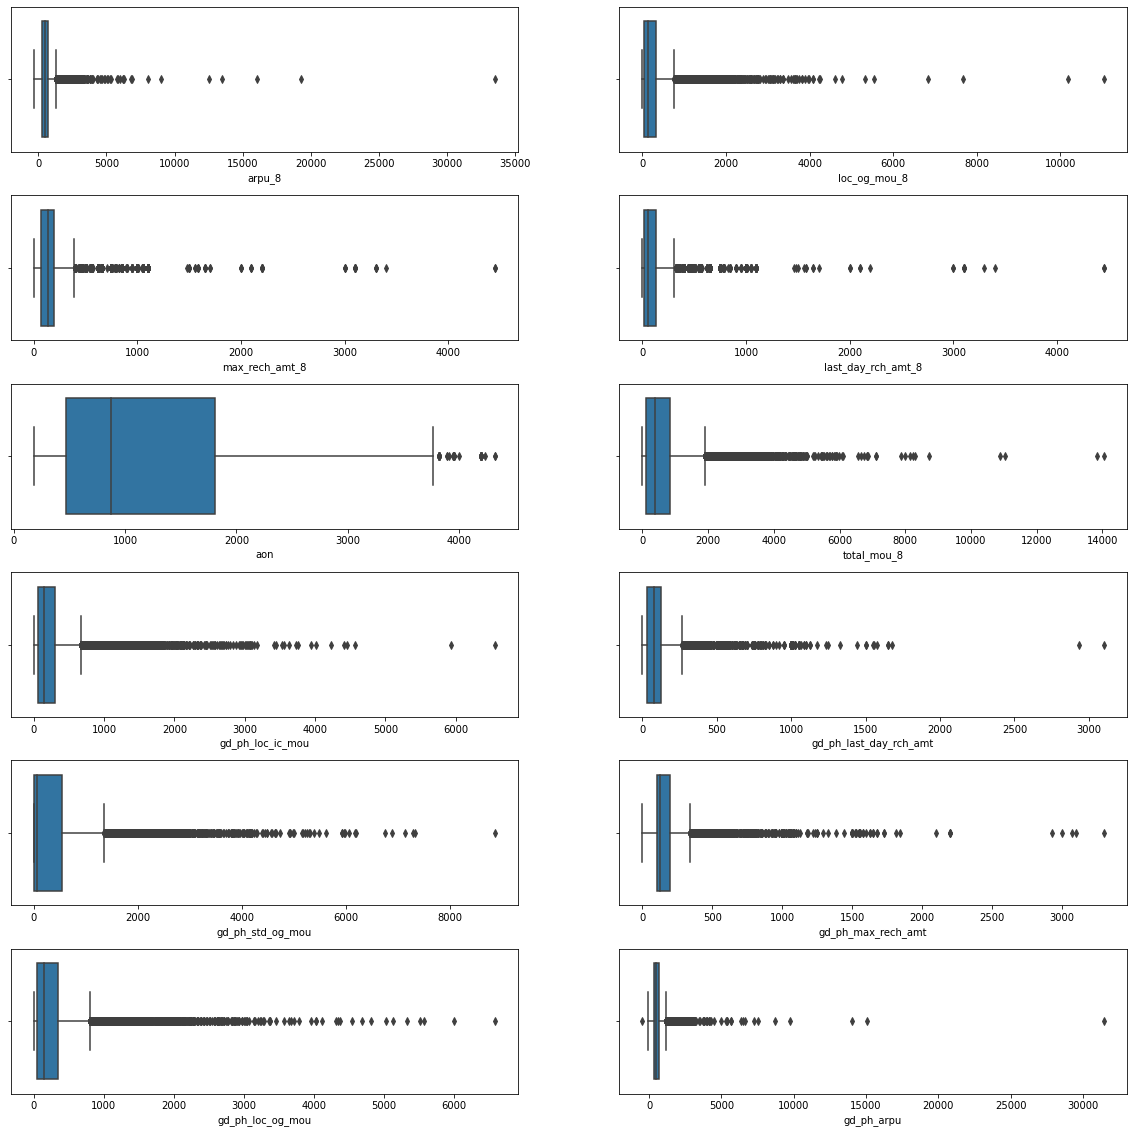

In [46]:
# List of features to be analyzed based on the above described data
col_boxplot = ['arpu_8', 'loc_og_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'total_mou_8', 
               'gd_ph_loc_ic_mou', 'gd_ph_last_day_rch_amt', 'gd_ph_std_og_mou', 'gd_ph_max_rech_amt', 
              'gd_ph_loc_og_mou', 'gd_ph_arpu']

# Plot boxplots for each variable
fig, axes = plt.subplots(6, 2, figsize=(20, 20))

for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 2)
    sns.boxplot(data[col], ax=axes[i, j])
    
plt.subplots_adjust(hspace=0.3) 
plt.show()

#### Data Visualisation

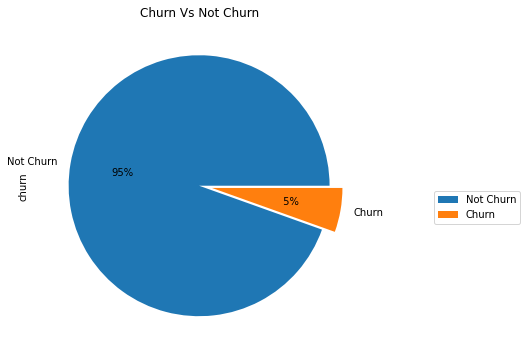

In [47]:
plt.figure(figsize=[12,6])
(data['churn'].value_counts(normalize=True)*100).plot.pie(labels = ['Not Churn','Churn'],explode=(0,0.10),autopct='%2.f%%')

plt.title('Churn Vs Not Churn')
plt.legend(bbox_to_anchor=(1.50,0.5))
plt.show()

It is quite evitable that there is class imbalance in the data

##### We will try to find correlation between variables

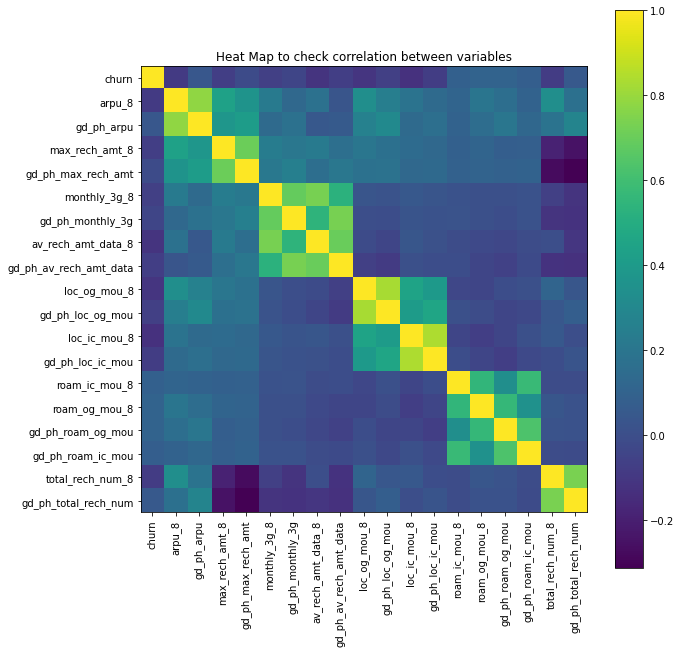

In [48]:
check_corr = data[['churn','arpu_8','gd_ph_arpu','max_rech_amt_8','gd_ph_max_rech_amt','monthly_3g_8','gd_ph_monthly_3g','av_rech_amt_data_8','gd_ph_av_rech_amt_data','loc_og_mou_8','gd_ph_loc_og_mou','loc_ic_mou_8','gd_ph_loc_ic_mou','roam_ic_mou_8','roam_og_mou_8','gd_ph_roam_og_mou','gd_ph_roam_ic_mou','total_rech_num_8','gd_ph_total_rech_num']]
corr = check_corr.corr()
plt.figure(num=None, figsize=(10, 10), facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title('Heat Map to check correlation between variables')
plt.show()

There are good correlation which means people using between the variables which means most people having same type of behaviour in good phase and Action phase.

In [49]:
data_plotx2 = data[['total_rech_data_8','total_rech_num_8','churn']]
data_plotx2['churn'] = np.where(data_plotx2['churn']==0, 'Not Churn', 'Churn')
data_plotx2['total_rech_data_group_8']=pd.cut(data_plotx2['total_rech_data_8'],[-1,0,5,10,25],labels=["No_Recharge","<=5_Recharges","5-10_Recharges",">10_Recharges"])
data_plotx2['total_rech_num_group_8']=pd.cut(data_plotx2['total_rech_num_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

				Distribution of total_rech_data_8 variable



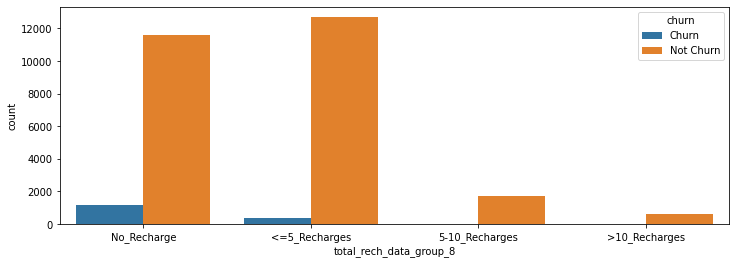

In [144]:
plt.figure(figsize=[12,4])
sns.countplot(data=data_plotx2,x="total_rech_data_group_8",hue="churn")
print("\t\t\t\tDistribution of total_rech_data_8 variable\n")
plt.show()


				Distribution of total_rech_num_8 variable



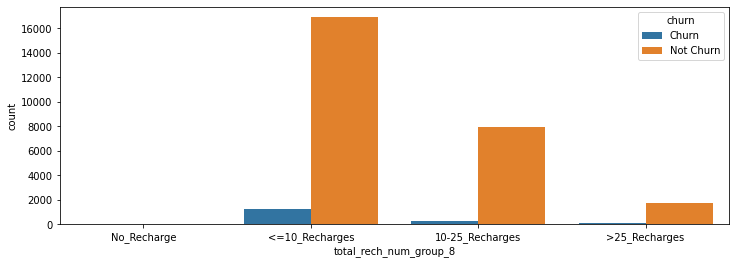

In [145]:
plt.figure(figsize=[12,4])
sns.countplot(data=data_plotx2,x="total_rech_num_group_8",hue="churn")
print("\t\t\t\tDistribution of total_rech_num_8 variable\n")

plt.show()

By referring both the graph we can say that users who are doing less number of recharges or not doing recharges are less likely to churn.

Text(0.5, 1.0, 'Correlating with Churn variable')

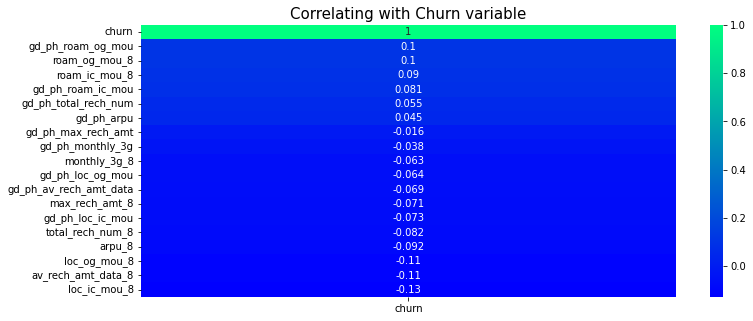

In [52]:

plt.figure(figsize=(12,5))
heatmap_churn = sns.heatmap(check_corr.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                                cmap='winter')
heatmap_churn.set_title( "Correlating with Churn variable", fontsize=15)

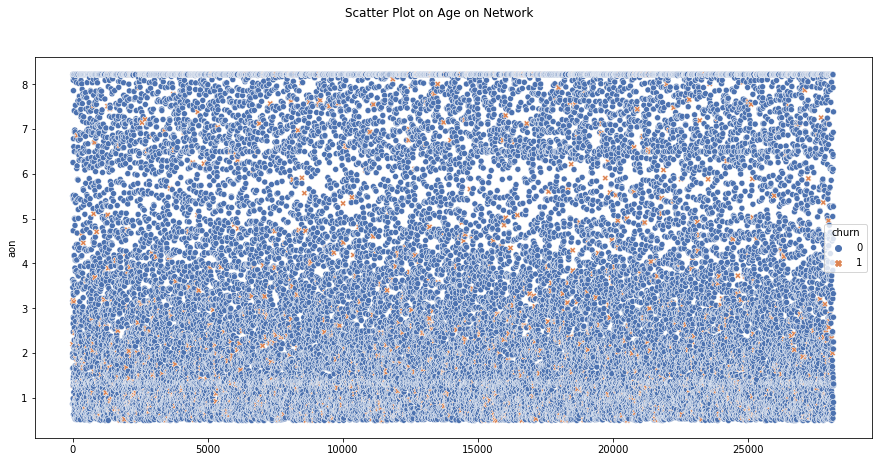

In [135]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = data['churn'].index, y = data['aon']/365, hue = data['churn'], style=data['churn'], palette="deep")
plt.suptitle('Scatter Plot on Age on Network')
plt.show()

There is no clear picture from this plot but we can say that people who are using network for more than 7 year are less likely to churn.

In [54]:
# Creating churn dataframe
data_churn = data[data['churn'] == 1]
# Creating not churn dataframe
data_non_churn = data[data['churn'] == 0]

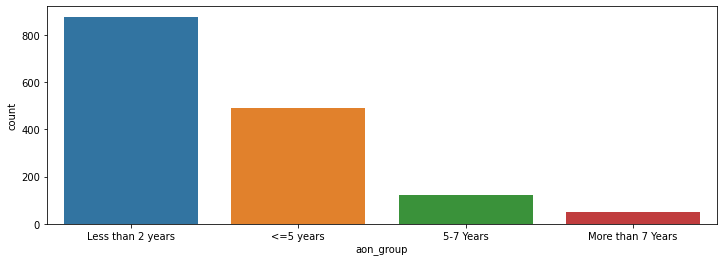

In [140]:
data_plotx3 = data_churn[['aon','churn']]
data_plotx3['aon_group']=pd.cut(data_plotx3['aon']/365,[0,2,5,8,12],labels=["Less than 2 years","<=5 years","5-7 Years","More than 7 Years"])

plt.figure(figsize=[12,4])
sns.countplot(data=data_plotx3,x="aon_group")

plt.show()

Now we got proper idea that the age of network is inversely proportional to churn, means user are less likely to churn if they spend a more number of years on same telecom provider.

[Text(0.5, 0, ' Churn and Non Churn Total expenditure in Action Phase')]

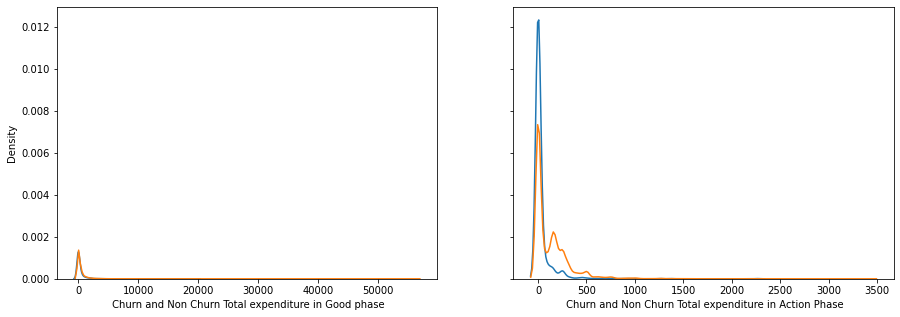

In [55]:
# Distribution plot
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
a1 = sns.distplot(data_churn['gd_ph_total_rech_amt_data'],label='churn',hist=False, ax=axes[0])
a1 = sns.distplot(data_non_churn['gd_ph_total_rech_amt_data'],label='non churn',hist=False, ax=axes[0])
a1.set(xlabel=' Churn and Non Churn Total expenditure in Good phase')

a2 = sns.distplot(data_churn['av_rech_amt_data_8'],label='churn',hist=False, ax=axes[1])
a2 = sns.distplot(data_non_churn['av_rech_amt_data_8'],label='non churn',hist=False, ax=axes[1])
a2.set(xlabel=' Churn and Non Churn Total expenditure in Action Phase')

After seeing First graph we can say that there is no difference in good phase for Churn and Non Churn but from second graph we can say people reduces their expenditure on the network before getting churned.

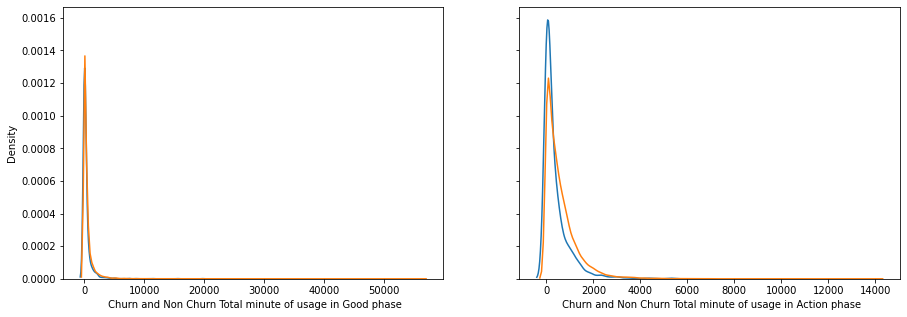

In [56]:
# Distribution plot
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
a1 = sns.distplot(data_churn['gd_ph_total_rech_amt_data'],label='churn',hist=False, ax = axes[0])
a1 = sns.distplot(data_non_churn['gd_ph_total_rech_amt_data'],label='non churn',hist=False, ax = axes[0])
a1.set(xlabel=' Churn and Non Churn Total minute of usage in Good phase')

ax = sns.distplot(data_churn['total_mou_8'],label='churn',hist=False, ax = axes[1])
ax = sns.distplot(data_non_churn['total_mou_8'],label='non churn',hist=False, ax = axes[1])
ax.set(xlabel=' Churn and Non Churn Total minute of usage in Action phase')
plt.show()

Same behaviour as ealier graph, user usage decreases in Action phase for Churn and Not Churn whereas it is same in good phase.

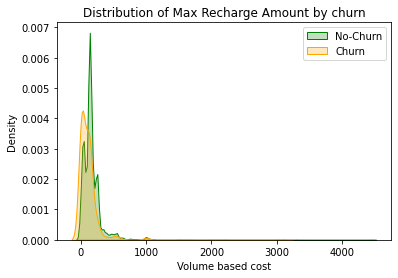

In [57]:
# churn vs max recharge amount
ax = sns.kdeplot(data.max_rech_amt_8[(data["churn"] == 0)],
                color="Green", shade = True)
ax = sns.kdeplot(data.max_rech_amt_8[(data["churn"] == 1)],
                ax =ax, color="Orange", shade= True)
ax.legend(["No-Churn","Churn"])
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

People who are tend to churn are not spending on long term recharges like prepaid recharge of 6 months or 1 years which can bound them for longer period.

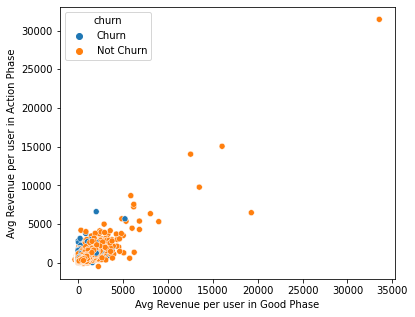

In [58]:
plt.figure(figsize=(6,5))
data_plot = data[['arpu_8','gd_ph_arpu','churn']]
data_plot['churn'] = np.where(data_plot['churn']==0, 'Not Churn', 'Churn')

ax = sns.scatterplot('arpu_8','gd_ph_arpu', hue='churn', data=data_plot)
ax.set(xlabel='Avg Revenue per user in Good Phase', ylabel='Avg Revenue per user in Action Phase')
plt.show()

We didnot get any clear picture from this but we can say that ARPU is less for the person who are going to churn.

<Figure size 720x432 with 0 Axes>

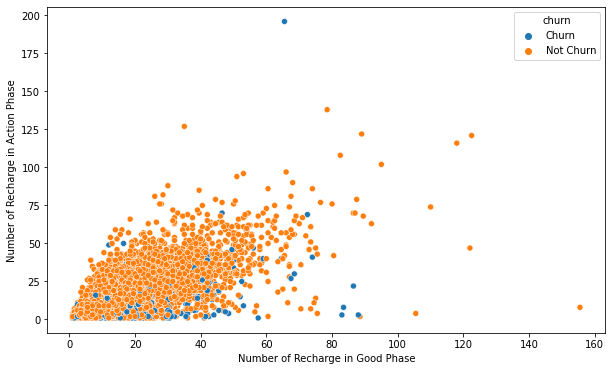

In [59]:
plt.figure(figsize=(10,6))
plt.figure(figsize=(10,6))
data_plot = data[['gd_ph_total_rech_num','total_rech_num_8','churn']]
data_plot['churn'] = np.where(data_plot['churn']==0, 'Not Churn', 'Churn')
ax = sns.scatterplot('gd_ph_total_rech_num','total_rech_num_8', hue='churn', data=data_plot)
ax.set(xlabel='Number of Recharge in Good Phase', ylabel='Number of Recharge in Action Phase')
plt.show()

We can say that people who are getting churn are tend to do less number of recharges respect to Non Churn(except some outliers)

### Data Preparation
<hr/>

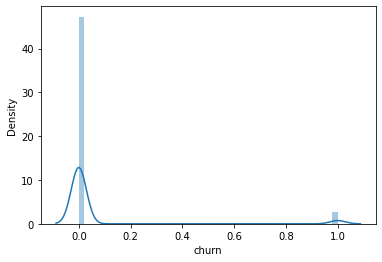

In [60]:
# Distribution of target variable
sns.distplot(data['churn'])
plt.show()

#### Observation Summary: 
> * Though the target varible is not skewed, it is highly imbalanced. 
> * We will handle this imbalance using `SMOTE` technique

In [61]:
# Capping the features with outliers

col_upr_lmt = [('arpu_8', 7000), ('loc_og_mou_8', 4000), ('max_rech_amt_8', 1000 ), ('last_day_rch_amt_8', 1000 ), 
               ('aon', 3000), ('total_mou_8', 4000), ('gd_ph_loc_ic_mou', 3000), ('gd_ph_last_day_rch_amt', 1000 ), 
               ('gd_ph_std_og_mou', 4000), ('gd_ph_max_rech_amt', 1500), ('gd_ph_loc_og_mou', 3000), ('gd_ph_arpu', 7000)]

for col, value in col_upr_lmt:
    data[col] = data[col].apply(lambda x : x if x < value else value)

data[col_boxplot].head()

,arpu_8,loc_og_mou_8,max_rech_amt_8,last_day_rch_amt_8,aon,total_mou_8,gd_ph_loc_ic_mou,gd_ph_last_day_rch_amt,gd_ph_std_og_mou,gd_ph_max_rech_amt,gd_ph_loc_og_mou,gd_ph_arpu
0,3171.480,255.79,1000,779,802,378.20,391.555,0.0,68.000,1185.0,478.035,1209.5150
1,137.362,63.04,30,10,315,171.56,52.630,25.0,136.870,122.0,333.135,435.4720
2,637.760,129.74,50,50,720,1068.53,106.505,25.0,848.990,50.0,95.565,556.1030
3,366.966,182.14,179,0,604,239.47,145.520,89.5,4.355,89.5,132.795,134.1235
4,409.230,0.00,455,455,1328,0.00,2.180,126.0,0.000,753.5,0.000,1669.9265


In [62]:
## Data seperation 
data_y = data['churn']
data_X = data.drop('churn', axis=1)

In [63]:
# Standardization 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_X[data_X.columns] = scaler.fit_transform(data_X[data_X.columns])

In [64]:
data_X.describe()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,total_rech_amt_data_8,total_mou_8,gd_ph_loc_og_t2c_mou,gd_ph_og_others,gd_ph_last_day_rch_amt,gd_ph_roam_og_mou,gd_ph_vol_2g_mb,gd_ph_total_rech_num,gd_ph_std_og_t2f_mou,gd_ph_monthly_3g,gd_ph_std_ic_t2t_mou,gd_ph_std_ic_t2f_mou,gd_ph_ic_others,gd_ph_av_rech_amt_data,gd_ph_monthly_2g,gd_ph_sachet_2g,gd_ph_total_rech_amt_data,gd_ph_spl_og_mou,gd_ph_loc_og_mou,gd_ph_max_rech_amt,gd_ph_total_rech_data,gd_ph_loc_ic_mou,gd_ph_isd_ic_mou,gd_ph_spl_ic_mou,gd_ph_std_og_mou,gd_ph_total_mou,gd_ph_roam_ic_mou,gd_ph_sachet_3g,gd_ph_isd_og_mou,gd_ph_std_ic_mou,gd_ph_arpu,gd_ph_vbc_3g,vbc_3g_8
count,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04,2.816300e+04
mean,1.405292e-16,6.055117e-18,-1.072260e-17,5.676672e-17,-3.998900e-17,-1.917454e-17,7.821193e-18,-1.009186e-17,-3.595226e-18,7.064303e-18,3.784448e-17,7.064303e-18,2.396817e-17,2.775262e-18,-1.873302e-17,1.261483e-17,-5.172079e-18,-6.446177e-17,-8.300556e-17,4.629641e-17,4.894553e-17,-8.363630e-17,2.068832e-17,2.876181e-17,4.036745e-17,6.812006e-18,9.082675e-18,-6.685858e-17,1.766076e-18,7.568896e-17,-2.472506e-17,-1.715616e-17,2.119291e-17,1.425475e-17,5.802820e-18,-9.234053e-17,-1.513779e-17,-3.078018e-17,-2.623884e-17,-3.406003e-17,7.064303e-18,-1.589468e-16,5.045931e-18,2.131906e-17,1.715616e-17,-3.002329e-17,4.503493e-17,3.279855e-18,4.125048e-17,7.770733e-17,1.412861e-17,2.396817e-17,6.004658e-17,6.509251e-17,-1.829150e-17,3.822293e-17,-1.639927e-18,-2.447276e-17,-2.644068e-16,5.979428e-17,-5.298227e-18
std,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,-2.024515e+00,-1.726900e-01,-1.942644e-01,-2.421177e-01,-7.004328e-01,-1.479481e-01,-5.235496e-01,-4.334935e-02,-3.310127e-01,-1.787292e-02,-7.524331e-01,-2.003008e-01,-1.314847e-01,-3.283146e-01,-2.458709e-01,-1.582545e-01,-9.809655e-02,-1.015879e+00,-1.124782e+00,-7.636476e-01,-5.526612e-01,-6.441886e-01,-3.455945e-01,-3.878618e-01,-4.277636e-01,-3.383137e-01,-1.865567e-01,-1.133108e+00,-2.870430e-01,-8.916857e-01,-2.702084e-01,-1.418634e-01,-9.559582e-01,-2.515146e-01,-4.200687e-01,-1.274668e+00,-1.580105e-01,-3.780680e-01,-2.023118e-01,-1.548304e-01,-9.737587e-02,-7.510140e-01,-4.677882e-01,-4

#### Handling Class Imbalance

In [65]:
# Using SMOTE for class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(data_X, data_y)

In [66]:
y_res.value_counts()

1    26625
0    26625
Name: churn, dtype: int64

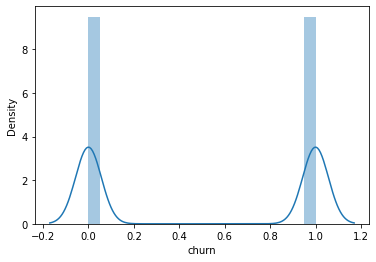

In [67]:
sns.distplot(y_res)
plt.show()

**As we can see that the target class is balanced**

## Modelling
<hr/>

### PCA: Principal Component Analysis

In [68]:
data_X.shape

(28163, 61)

In [69]:
#importing the library 
from sklearn.decomposition import PCA

#fitting the data 
pca = PCA(n_components=25) # selecting the principal number of components
X_pca = pca.fit_transform(X_res)
X_pca.shape

(53250, 25)

### Logistic Regression Modelling

> For logistic regression we will be using the unaltered X and y so that we can use RFE for feature selection instead of PCA, to find out the strong predictor of churn 

In [70]:
# Splitting the data into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.7, random_state=42)

In [71]:
import statsmodels.api as sm

In [72]:
# Initial logistic regression model #1 using statsmodel
logreg_m1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logreg_m1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37275
Model:                            GLM   Df Residuals:                    37215
Model Family:                Binomial   Df Model:                           59
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15803.
Date:                Mon, 13 Mar 2023   Deviance:                       31606.
Time:                        10:14:56   Pearson chi2:                 6.53e+10
No. Iterations:                   100   Pseudo R-squ. (CS):             0.4163
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.6156      0.025    -63.999      0.000      -1.665      -1.566
arpu_8                        0.1555      0.051      3.043      0.002       0.055       0.256
roam_ic_mou_8                -0.0030      0.019     -0.160      0.873      -0.039       0.033
roam_og_mou_8                 0.1404      0.037      3.807      0.000       0.068       0.213
loc_og_t2c_mou_8              0.1671      0.026      6.332      0.000       0.115       0.219
loc_og_mou_8                 -0.6470      0.117     -5.522      0.000      -0.877      -0.417
std_og_t2f_mou_8             -0.1175      0.042     -2.800      0.005      -0.200      -0.035
std_og_mou_8                 -0.1553      0.173     -0.900      0.368      -0.494       0.183
isd_og_mou_8                 -0.1955      0.072     -2.699      0.007      -0.337      -0.054
spl_og_mou_8                 -0.2999      0.042     -7.184      0.000      -0.382      -0.218
og_others_8                   0.0959      0.028      3.458      0.001       0.042       0.150
loc_ic_mou_8                 -1.6870      0.066    -25.497      0.000      -1.817      -1.557
std_ic_t2t_mou_8             -0.3882      0.061     -6.338      0.000      -0.508      -0.268
std_ic_t2f_mou_8             -0.1176      0.059     -2.007      0.045      -0.232      -0.003
std_ic_mou_8                 -0.3252      0.055     -5.893      0.000      -0.433      -0.217
spl_ic_mou_8                 -0.4396      0.029    -15.208      0.000      -0.496      -0.383
isd_ic_mou_8                 -0.1573      0.038     -4.193      0.000      -0.231      -0.084
ic_others_8                   0.1023      0.037      2.734      0.006       0.029       0.176
total_rech_num_8             -0.3591      0.034    -10.436      0.000      -0.427      -0.292
max_rech_amt_8                0.2019      0.026      7.654      0.000       0.150       0.254
last_day_rch_amt_8           -0.4658      0.022    -20.824      0.000      -0.510      -0.422
total_rech_data_8            -0.3696      0.027    -13.729      0.000      -0.422      -0.317
av_rech_amt_data_8           -0.6201      0.067     -9.223      0.000      -0.752      -0.488
vol_2g_mb_8                  -0.2263      0.032     -6.980      0.000      -0.290      -0.163
monthly_2g_8                 -0.3080      0.035     -8.722      0.000      -0.377      -0.239
sachet_2g_8                  -0.2452      0.023    -10.666      0.000      -0.290      -0.200
monthly_3g_8                 -0.3744      0.055     -6.773      0.000      -0.483      -0.266
sachet_3g_8                  -0.1189      0.038     -3.161      0.002      -0.193      -0.045
aon                          -0.3180      0.018    -17.899      0.000      -0.353      -0.283
total_rech_amt_data_8         0.4341      0.058      7.545      0.000      

### Recursive Feature Selection (RFE)

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Create LR object
logreg = LogisticRegression(solver='liblinear')

# Run RFE for 25 features
rfe = RFE(logreg, n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [74]:
rfe_col = data_X.columns[rfe.support_]
rfe_col

Index(['arpu_8', 'loc_og_mou_8', 'std_og_mou_8', 'isd_og_mou_8',
       'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'aon',
       'total_rech_amt_data_8', 'gd_ph_roam_og_mou', 'gd_ph_vol_2g_mb',
       'gd_ph_std_ic_t2t_mou', 'gd_ph_monthly_2g', 'gd_ph_loc_og_mou',
       'gd_ph_loc_ic_mou', 'gd_ph_std_og_mou', 'gd_ph_sachet_3g',
       'gd_ph_isd_og_mou'],
      dtype='object')

In [75]:
# Building model #2 with features selected using RFE 
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37275
Model:                            GLM   Df Residuals:                    37249
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16034.
Date:                Mon, 13 Mar 2023   Deviance:                       32068.
Time:                        10:15:32   Pearson chi2:                 2.96e+11
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4090
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.5739      0.025    -64.171      0.000      -1.622      -1.526
arpu_8                    0.2107      0.034      6.147      0.000       0.144       0.278
loc_og_mou_8             -0.9859      0.056    -17.468      0.000      -1.097      -0.875
std_og_mou_8             -0.6454      0.031    -21.076      0.000      -0.705      -0.585
isd_og_mou_8             -0.3177      0.069     -4.608      0.000      -0.453      -0.183
loc_ic_mou_8             -1.7939      0.066    -27.118      0.000      -1.924      -1.664
std_ic_t2t_mou_8         -0.4054      0.058     -6.998      0.000      -0.519      -0.292
std_ic_mou_8             -0.3368      0.039     -8.742      0.000      -0.412      -0.261
spl_ic_mou_8             -0.4742      0.027    -17.289      0.000      -0.528      -0.420
total_rech_num_8         -0.2822      0.023    -12.068      0.000      -0.328      -0.236
max_rech_amt_8            0.2151      0.024      8.877      0.000       0.168       0.263
last_day_rch_amt_8       -0.4779      0.022    -21.454      0.000      -0.522      -0.434
total_rech_data_8        -0.5287      0.037    -14.267      0.000      -0.601      -0.456
av_rech_amt_data_8       -0.9499      0.037    -25.440      0.000      -1.023      -0.877
vol_2g_mb_8              -0.2880      0.031     -9.400      0.000      -0.348      -0.228
aon                      -0.3247      0.017    -18.733      0.000      -0.359      -0.291
total_rech_amt_data_8     0.4403      0.047      9.368      0.000       0.348       0.532
gd_ph_roam_og_mou         0.2563      0.015     17.515      0.000       0.228       0.285
gd_ph_vol_2g_mb           0.2243      0.021     10.564      0.000       0.183       0.266
gd_ph_std_ic_t2t_mou      0.2792      0.028     10.123      0.000       0.225       0.333
gd_ph_monthly_2g         -0.3028      0.021    -14.239      0.000      -0.344      -0.261
gd_ph_loc_og_mou          0.4489      0.037     12.168      0.000       0.377       0.521
gd_ph_loc_ic_mou          0.6584      0.044     15.066      0.000       0.573       0.744
gd_ph_std_og_mou          0.5272      0.022     24.342      0.000       0.485       0.570
gd_ph_sachet_3g           0.2173      0.017     12.463      0.000       0.183       0.252
gd_ph_isd_og_mou          0.2433      0.065      3.752      0.000       0.116       0.370
=========================================================================================
"""

In [76]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.102246,0
1,1,0.958088,1
2,1,0.837770,1
3,0,0.800685,1
4,1,0.093739,0


In [77]:
## Evaluating this model
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14818  3823]
 [ 2979 15655]]

Accuracy : 0.8175184439973172


In [78]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,isd_og_mou_8,5.59
24,gd_ph_isd_og_mou,5.53
0,arpu_8,4.42
1,loc_og_mou_8,4.20
4,loc_ic_mou_8,4.09
21,gd_ph_loc_ic_mou,3.71
20,gd_ph_loc_og_mou,3.47
15,total_rech_amt_data_8,3.44
11,total_rech_data_8,3.00
12,av_rech_amt_data_8,2.74


Since we can see the column `isd_og_mou_8` has a very high VIF we will be dropping this column.

In [79]:
rfe_col = rfe_col.drop('isd_og_mou_8', 1)

In [80]:
# Build new model #3
X_train_sm = sm.add_constant(X_train[rfe_col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37275
Model:                            GLM   Df Residuals:                    37250
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16047.
Date:                Mon, 13 Mar 2023   Deviance:                       32094.
Time:                        10:15:35   Pearson chi2:                 3.32e+11
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4086
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.5719      0.025    -64.134      0.000      -1.620      -1.524
arpu_8                    0.1896      0.034      5.520      0.000       0.122       0.257
loc_og_mou_8             -0.9800      0.056    -17.377      0.000      -1.091      -0.869
std_og_mou_8             -0.6341      0.031    -20.709      0.000      -0.694      -0.574
loc_ic_mou_8             -1.7971      0.066    -27.167      0.000      -1.927      -1.667
std_ic_t2t_mou_8         -0.4029      0.058     -6.959      0.000      -0.516      -0.289
std_ic_mou_8             -0.3381      0.039     -8.781      0.000      -0.414      -0.263
spl_ic_mou_8             -0.4739      0.027    -17.282      0.000      -0.528      -0.420
total_rech_num_8         -0.2807      0.023    -11.996      0.000      -0.327      -0.235
max_rech_amt_8            0.2188      0.024      9.124      0.000       0.172       0.266
last_day_rch_amt_8       -0.4788      0.022    -21.587      0.000      -0.522      -0.435
total_rech_data_8        -0.5327      0.037    -14.370      0.000      -0.605      -0.460
av_rech_amt_data_8       -0.9424      0.037    -25.271      0.000      -1.016      -0.869
vol_2g_mb_8              -0.2891      0.031     -9.435      0.000      -0.349      -0.229
aon                      -0.3243      0.017    -18.709      0.000      -0.358      -0.290
total_rech_amt_data_8     0.4420      0.047      9.410      0.000       0.350       0.534
gd_ph_roam_og_mou         0.2580      0.015     17.623      0.000       0.229       0.287
gd_ph_vol_2g_mb           0.2240      0.021     10.559      0.000       0.182       0.266
gd_ph_std_ic_t2t_mou      0.2807      0.028     10.186      0.000       0.227       0.335
gd_ph_monthly_2g         -0.3023      0.021    -14.233      0.000      -0.344      -0.261
gd_ph_loc_og_mou          0.4494      0.037     12.174      0.000       0.377       0.522
gd_ph_loc_ic_mou          0.6631      0.044     15.166      0.000       0.577       0.749
gd_ph_std_og_mou          0.5252      0.022     24.264      0.000       0.483       0.568
gd_ph_sachet_3g           0.2172      0.017     12.456      0.000       0.183       0.251
gd_ph_isd_og_mou         -0.0301      0.027     -1.112      0.266      -0.083       0.023
=========================================================================================
"""

In [81]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.101469,0
1,1,0.957897,1
2,1,0.837984,1
3,0,0.801968,1
4,1,0.093664,0


In [82]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14805  3836]
 [ 2981 15653]]

Accuracy : 0.8171160295103957


In [83]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,4.35
1,loc_og_mou_8,4.20
3,loc_ic_mou_8,4.09
20,gd_ph_loc_ic_mou,3.71
19,gd_ph_loc_og_mou,3.47
14,total_rech_amt_data_8,3.44
10,total_rech_data_8,3.00
11,av_rech_amt_data_8,2.73
8,max_rech_amt_8,2.66
2,std_og_mou_8,2.60


**As we can see `gd_ph_isd_og_mou` feature has a high p-value hence we will be dropping it** 

In [84]:
# Drop 'gd_ph_isd_og_mou'
rfe_col = rfe_col.drop('gd_ph_isd_og_mou', 1)

In [85]:
# Build new model #4
X_train_sm = sm.add_constant(X_train[rfe_col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37275
Model:                            GLM   Df Residuals:                    37251
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16048.
Date:                Mon, 13 Mar 2023   Deviance:                       32095.
Time:                        10:15:38   Pearson chi2:                 3.72e+11
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4086
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.5713      0.024    -64.140      0.000      -1.619      -1.523
arpu_8                    0.1718      0.030      5.718      0.000       0.113       0.231
loc_og_mou_8             -0.9723      0.056    -17.398      0.000      -1.082      -0.863
std_og_mou_8             -0.6255      0.030    -21.176      0.000      -0.683      -0.568
loc_ic_mou_8             -1.7969      0.066    -27.167      0.000      -1.926      -1.667
std_ic_t2t_mou_8         -0.4033      0.058     -6.971      0.000      -0.517      -0.290
std_ic_mou_8             -0.3364      0.038     -8.755      0.000      -0.412      -0.261
spl_ic_mou_8             -0.4739      0.027    -17.281      0.000      -0.528      -0.420
total_rech_num_8         -0.2779      0.023    -11.958      0.000      -0.323      -0.232
max_rech_amt_8            0.2192      0.024      9.146      0.000       0.172       0.266
last_day_rch_amt_8       -0.4768      0.022    -21.591      0.000      -0.520      -0.434
total_rech_data_8        -0.5341      0.037    -14.409      0.000      -0.607      -0.461
av_rech_amt_data_8       -0.9367      0.037    -25.388      0.000      -1.009      -0.864
vol_2g_mb_8              -0.2886      0.031     -9.424      0.000      -0.349      -0.229
aon                      -0.3234      0.017    -18.683      0.000      -0.357      -0.289
total_rech_amt_data_8     0.4418      0.047      9.403      0.000       0.350       0.534
gd_ph_roam_og_mou         0.2608      0.014     18.108      0.000       0.233       0.289
gd_ph_vol_2g_mb           0.2237      0.021     10.546      0.000       0.182       0.265
gd_ph_std_ic_t2t_mou      0.2804      0.028     10.174      0.000       0.226       0.334
gd_ph_monthly_2g         -0.3022      0.021    -14.229      0.000      -0.344      -0.261
gd_ph_loc_og_mou          0.4488      0.037     12.164      0.000       0.377       0.521
gd_ph_loc_ic_mou          0.6640      0.044     15.189      0.000       0.578       0.750
gd_ph_std_og_mou          0.5258      0.022     24.300      0.000       0.483       0.568
gd_ph_sachet_3g           0.2175      0.017     12.476      0.000       0.183       0.252
=========================================================================================
"""

In [86]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.100912,0
1,1,0.957878,1
2,1,0.837925,1
3,0,0.802434,1
4,1,0.093906,0


In [87]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14798  3843]
 [ 2986 15648]]

Accuracy : 0.8167940979208584


In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,loc_og_mou_8,4.14
3,loc_ic_mou_8,4.09
20,gd_ph_loc_ic_mou,3.70
0,arpu_8,3.68
19,gd_ph_loc_og_mou,3.47
14,total_rech_amt_data_8,3.44
10,total_rech_data_8,3.00
11,av_rech_amt_data_8,2.67
8,max_rech_amt_8,2.66
2,std_og_mou_8,2.47


In [89]:
# Drop 'loc_ic_mou_8'
rfe_col = rfe_col.drop('loc_ic_mou_8', 1)

In [90]:
# Build new model #5
X_train_sm = sm.add_constant(X_train[rfe_col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37275
Model:                            GLM   Df Residuals:                    37252
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16539.
Date:                Mon, 13 Mar 2023   Deviance:                       33078.
Time:                        10:15:42   Pearson chi2:                 9.90e+11
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3928
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.4210      0.023    -62.811      0.000      -1.465      -1.377
arpu_8                    0.1634      0.030      5.514      0.000       0.105       0.221
loc_og_mou_8             -1.8296      0.053    -34.253      0.000      -1.934      -1.725
std_og_mou_8             -0.7194      0.030    -24.318      0.000      -0.777      -0.661
std_ic_t2t_mou_8         -0.4456      0.058     -7.626      0.000      -0.560      -0.331
std_ic_mou_8             -0.4128      0.039    -10.587      0.000      -0.489      -0.336
spl_ic_mou_8             -0.4988      0.028    -17.938      0.000      -0.553      -0.444
total_rech_num_8         -0.3157      0.023    -13.576      0.000      -0.361      -0.270
max_rech_amt_8            0.2106      0.024      8.949      0.000       0.165       0.257
last_day_rch_amt_8       -0.4792      0.022    -21.915      0.000      -0.522      -0.436
total_rech_data_8        -0.5565      0.037    -15.103      0.000      -0.629      -0.484
av_rech_amt_data_8       -0.9784      0.037    -26.623      0.000      -1.050      -0.906
vol_2g_mb_8              -0.3098      0.031    -10.105      0.000      -0.370      -0.250
aon                      -0.3458      0.017    -20.454      0.000      -0.379      -0.313
total_rech_amt_data_8     0.4696      0.046     10.108      0.000       0.379       0.561
gd_ph_roam_og_mou         0.2766      0.014     19.137      0.000       0.248       0.305
gd_ph_vol_2g_mb           0.2420      0.021     11.554      0.000       0.201       0.283
gd_ph_std_ic_t2t_mou      0.3266      0.027     12.190      0.000       0.274       0.379
gd_ph_monthly_2g         -0.3111      0.021    -14.991      0.000      -0.352      -0.270
gd_ph_loc_og_mou          0.8110      0.036     22.734      0.000       0.741       0.881
gd_ph_loc_ic_mou         -0.2466      0.024    -10.247      0.000      -0.294      -0.199
gd_ph_std_og_mou          0.6113      0.022     28.141      0.000       0.569       0.654
gd_ph_sachet_3g           0.2243      0.017     13.044      0.000       0.191       0.258
=========================================================================================
"""

In [91]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.072911,0
1,1,0.962445,1
2,1,0.838183,1
3,0,0.795785,1
4,1,0.081851,0


In [92]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14665  3976]
 [ 3135 15499]]

Accuracy : 0.8092287055667338


In [93]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,3.68
1,loc_og_mou_8,3.53
13,total_rech_amt_data_8,3.44
18,gd_ph_loc_og_mou,3.18
9,total_rech_data_8,2.99
7,max_rech_amt_8,2.66
10,av_rech_amt_data_8,2.66
2,std_og_mou_8,2.46
3,std_ic_t2t_mou_8,2.16
8,last_day_rch_amt_8,1.98


> The VIF values looks good now, we can proceed further


In [94]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [95]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8317591499409681

In [96]:
# Let us calculate specificity
TN / float(TN+FP)

0.7867067217423958

In [97]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.21329327825760422


In [98]:
# positive predictive value 
print (TP / float(TP+FP))

0.7958408215661104


In [99]:
# Negative predictive value
print (TN / float(TN+ FN))

0.823876404494382


### Plotting the ROC curve 

In [100]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

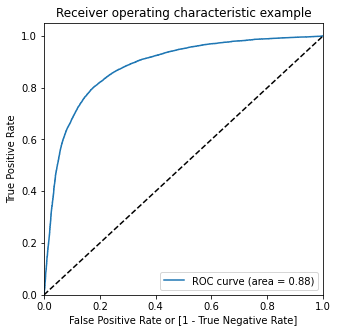

In [101]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Optimal cutoff point

In [102]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.072911,0,1,0,0,0,0,0,0,0,0,0
1,1,0.962445,1,1,1,1,1,1,1,1,1,1,1
2,1,0.838183,1,1,1,1,1,1,1,1,1,1,0
3,0,0.795785,1,1,1,1,1,1,1,1,1,0,0
4,1,0.081851,0,1,0,0,0,0,0,0,0,0,0


In [103]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5, 0.5, 0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.499906  1.000000  0.000000
0.1   0.1  0.651536  0.979446  0.323749
0.2   0.2  0.723783  0.952453  0.495199
0.3   0.3  0.767646  0.918858  0.616491
0.4   0.4  0.796137  0.882258  0.710048
0.5   0.5  0.809229  0.831759  0.786707
0.6   0.6  0.808075  0.760277  0.855855
0.7   0.7  0.782294  0.651712  0.912827
0.8   0.8  0.723568  0.493453  0.953597
0.9   0.9  0.595359  0.207470  0.983102


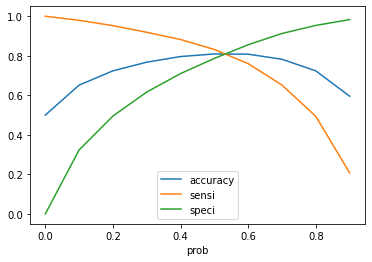

In [104]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Let us use our cutoff as `0.6`

In [105]:
X_test = X_test[rfe_col]
X_test_sm = sm.add_constant(X_test)

# Predict on test data

y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.6 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
18421,0,0.851756,1
40973,1,0.976797,1
3279,0,0.270304,0
23477,0,0.161298,0
31712,1,0.773865,1


In [106]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)}')

[[6845 1139]
 [1940 6051]]

Accuracy : 0.8072613458528951


In [107]:
# Top 10 predictors

abs(res.params).sort_values(ascending=False)[0:11]

loc_og_mou_8             1.829592
const                    1.421016
av_rech_amt_data_8       0.978353
gd_ph_loc_og_mou         0.811046
std_og_mou_8             0.719371
gd_ph_std_og_mou         0.611287
total_rech_data_8        0.556510
spl_ic_mou_8             0.498827
last_day_rch_amt_8       0.479193
total_rech_amt_data_8    0.469568
std_ic_t2t_mou_8         0.445577
dtype: float64

> * So using the Logistic Regression Model we are geting an accuracy of `80.9%` on train data and `80.73%` on test data. 
> * We can clearly see most of the important features are form the `action` phase, which is inline with our business understanding that `action` phase needs more attention

### Decision Tree Model

In [108]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, train_size=0.7, random_state=10)

In [109]:
from sklearn.tree import DecisionTreeClassifier

# Initial classifier
intial_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
intial_dt.fit(X_train, y_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}\n')

y_test_pred = intial_dt.predict(X_test)

# Print the report on test data
print(" Test Accuracy")
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy : 0.8876727028839705

 Test Accuracy
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      8012
           1       0.83      0.88      0.85      7963

    accuracy                           0.85     15975
   macro avg       0.85      0.85      0.85     15975
weighted avg       0.85      0.85      0.85     15975



In [110]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [112]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [113]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [114]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


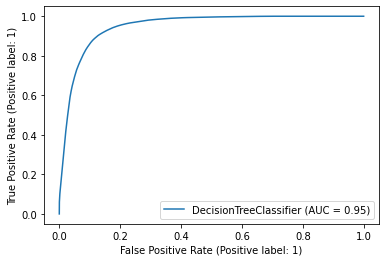

In [115]:
# Plotting the ROC curve
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

#plot_roc_curve(intial_dt, X_train, y_train, drop_intermediate=False)

RocCurveDisplay.from_estimator(intial_dt, X_train, y_train, drop_intermediate=False)
plt.show()

#### Hyperparameter Tunning using GridSearchCV

In [116]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

# Define parameters
params = {
    "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 800, 1000],
    "min_samples_leaf" : [1, 5, 10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

# Perform gridsearch
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [117]:
grid_search.best_score_

0.8758149502475066

In [118]:
# Best estimator
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, random_state=42)

In [119]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

# Printing the train accuracy 
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}\n')

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy : 0.9877934272300469

              precision    recall  f1-score   support

           0       0.92      0.85      0.89      8012
           1       0.86      0.93      0.89      7963

    accuracy                           0.89     15975
   macro avg       0.89      0.89      0.89     15975
weighted avg       0.89      0.89      0.89     15975



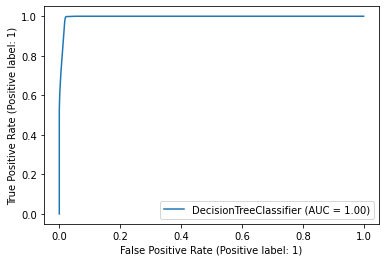

In [120]:
# Plotting the ROC Curve
RocCurveDisplay.from_estimator(dt_best, X_train, y_train)
#plot_roc_curve(dt_best, X_train, y_train)
plt.show()

> We are getting an accuracy of `88%` on the test data with the decision tree model 

### Random Forest Model 

Train accuracy : 0.8876727028839705
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      8012
           1       0.87      0.88      0.88      7963

    accuracy                           0.88     15975
   macro avg       0.88      0.88      0.88     15975
weighted avg       0.88      0.88      0.88     15975



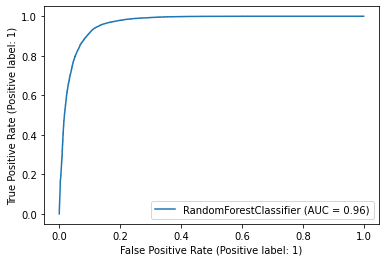

In [121]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=25, oob_score=True)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = rf.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

# Plotting ROC
#plot_roc_curve(rf, X_train, y_train)
RocCurveDisplay.from_estimator(rf, X_train, y_train)
plt.show()

#### Hyperparameter Tuning

In [122]:
rf = RandomForestClassifier(random_state=25, n_jobs=-1)

# Define parameters
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [123]:
grid_search.best_score_

0.9253923892319132

In [124]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

In [125]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

#printing the Train Accuracy - 
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

# Print the test accuracy report
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy : 0.9812743125419182
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      8012
           1       0.92      0.95      0.94      7963

    accuracy                           0.94     15975
   macro avg       0.94      0.94      0.94     15975
weighted avg       0.94      0.94      0.94     15975



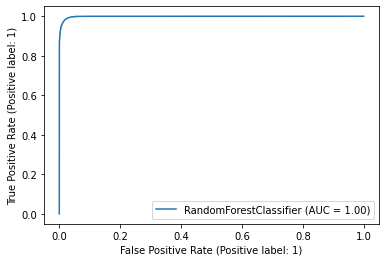

In [126]:
#plot_roc_curve(rf_best, X_train, y_train)
RocCurveDisplay.from_estimator(rf_best, X_train, y_train)
plt.show()

### Model Selection Conclusion

> We tried creating models on Logistic Regression, Decision Tree and Random Forest. The results are as follows - 

##### Decision Tree (Before Hyperparameter Tuning)

|Parameter| Train | Test | 
|---------|-------|------|
|Accuracy | 89%   | 85%  |
|Recall   | -     | 82%  |
|Precision| -     | 87%  |

##### Decision Tree (After Hyperparameter Tuning)

|Parameter| Train | Test | 
|---------|-------|------|
|Accuracy | 98.9% | 88%  |
|Recall   | -     | 85%  |
|Precision| -     | 89%  |

##### Logistic Regression

|Parameter| Train | Test | 
|---------|-------|------|
|Accuracy | 80.9% | 80.7%|
|Recall   | -     | 85.6%|

##### Random Forest (Before Hyperparameter Tuning)

|Parameter| Train | Test | 
|---------|-------|------|
|Accuracy | 89.12%| 88%  |
|Recall   | -     | 87%  |
|Precision| -     | 89%  |

##### Random Forrest (After Hyperparameter Tuning)

|Parameter| Train | Test | 
|---------|-------|------|
|Accuracy | 98.08%| 94%  |
|Recall   | -     | 92%  |
|Precision| -     | 95%  |

> Therefore we chose the Random Forest Model as our final model and got an **Accuracy** of `94%` on the test data set with `92%` **Recall** which suggest that it has a very high probability of correctly predicting the customer who are likely to churn. 

In [127]:
# Building the final Random Forest Model post hypertuning

final_model = RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1, n_estimators=50,
                       random_state=25)

In [128]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)



# Print the report
print("Report on train data")
print(metrics.classification_report(y_train, y_train_pred))

print("Report on test data")
print(metrics.classification_report(y_test, y_test_pred))

Report on train data
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     18613
           1       0.97      0.99      0.98     18662

    accuracy                           0.98     37275
   macro avg       0.98      0.98      0.98     37275
weighted avg       0.98      0.98      0.98     37275

Report on test data
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      8012
           1       0.92      0.95      0.94      7963

    accuracy                           0.94     15975
   macro avg       0.94      0.94      0.94     15975
weighted avg       0.94      0.94      0.94     15975



### Feature Selection 

In [129]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

arpu_8                   0.16
loc_og_mou_8            -1.83
std_og_mou_8            -0.72
std_ic_t2t_mou_8        -0.45
std_ic_mou_8            -0.41
spl_ic_mou_8            -0.50
total_rech_num_8        -0.32
max_rech_amt_8           0.21
last_day_rch_amt_8      -0.48
total_rech_data_8       -0.56
av_rech_amt_data_8      -0.98
vol_2g_mb_8             -0.31
aon                     -0.35
total_rech_amt_data_8    0.47
gd_ph_roam_og_mou        0.28
gd_ph_vol_2g_mb          0.24
gd_ph_std_ic_t2t_mou     0.33
gd_ph_monthly_2g        -0.31
gd_ph_loc_og_mou         0.81
gd_ph_loc_ic_mou        -0.25
gd_ph_std_og_mou         0.61
gd_ph_sachet_3g          0.22
dtype: float64

In [130]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

arpu_8                    20.14
loc_og_mou_8            -225.58
std_og_mou_8             -88.70
std_ic_t2t_mou_8         -54.94
std_ic_mou_8             -50.89
spl_ic_mou_8             -61.50
total_rech_num_8         -38.92
max_rech_amt_8            25.97
last_day_rch_amt_8       -59.08
total_rech_data_8        -68.62
av_rech_amt_data_8      -120.63
vol_2g_mb_8              -38.19
aon                      -42.64
total_rech_amt_data_8     57.90
gd_ph_roam_og_mou         34.10
gd_ph_vol_2g_mb           29.84
gd_ph_std_ic_t2t_mou      40.27
gd_ph_monthly_2g         -38.36
gd_ph_loc_og_mou         100.00
gd_ph_loc_ic_mou         -30.40
gd_ph_std_og_mou          75.37
gd_ph_sachet_3g           27.65
dtype: float64

In [131]:
#Sorting the feature variables based on their relative coefficient values

sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx.sort_values(ascending=True)

total_rech_amt_data_8     0
arpu_8                    1
std_og_mou_8              2
total_rech_num_8          3
max_rech_amt_8            4
std_ic_mou_8              5
total_rech_data_8         6
gd_ph_roam_og_mou         7
spl_ic_mou_8              8
std_ic_t2t_mou_8          9
loc_og_mou_8             10
vol_2g_mb_8              11
last_day_rch_amt_8       12
gd_ph_loc_ic_mou         13
gd_ph_monthly_2g         14
gd_ph_std_ic_t2t_mou     15
gd_ph_loc_og_mou         16
av_rech_amt_data_8       17
gd_ph_sachet_3g          18
aon                      19
gd_ph_std_og_mou         20
gd_ph_vol_2g_mb          21
dtype: int64

### Conclusion Summary: 

>We can infer from our model the most important features that are impacting the churn. 

>**The top churn predictors are :**

| Features | Rank |
| ---------- |------|
| total_rech_amt_data_8 |$1$ |
|arpu_8    |       $ 2$|       
|std_og_mou_8  |$3$|
|total_rech_num_8          |$4$|
|max_rech_amt_8            |$5$|
|std_ic_mou_8              |$6$|
|total_rech_data_8         |$7$|
|gd_ph_std_og_mou          |$8$|
|spl_ic_mou_8              |$9$|
|std_ic_t2t_mou_8          |$10$|
|loc_og_mou_8             |$11$|

> We can see from the above table that most features that affect the churn are related to the `Recharge Amount` and `Minutes of Usage` which are basically the two features that generates the most revenue for the telecom operator as well as decrease in these usage features suggest that the customers have started to invest less on the network. 
From this we can also infer from our business understanding that as we move into the `Action` phase which is the 8th month, the impact of `Usage-Based Churn` becomes more and more evident. 

**As now we can see the impact we can formulate strategies that the telecom operater can use in order to reduce this churn and prevent the revenue leakage as much as possible.** 

> **`Average Revenue Per User` is one of the most imporant feature in churn prediction which suggest that customers who are willing to invest less on the network have a high tendency to churn. The company should focus on deals for such customers which can encourage them to invest in the network and in turn reduce churn propability along with bringing in revenue.**

> **`Age On Network` is also one of the influential features as we could see during our analysis that customers whom age is less than $4$ years on the network are more likely to churn. 
This behaviour also suggests about those customers who have churned even after being with the network for more than 4 years is that either, they are temporarily switching to a different network and will be back or there is something that has gone quite wrong with the services provided to them due to which they churned.
Such customers can be brought back to the network by genuinely investing some time to fix the issue these customers are facing. As all these customers are High-Value customers, the revenue brought in by each of them would not be small.** 

> **`Minutes of Usage` in a `Local` or `STD` capacity as well as `Data Recharge Amount` are also strong predictors of churn. It suggests the customers who are willing to invest less on the outgoing calls or on the data services are either not happy with the network or don't have that much network usage. As we have build our model based on the High-value customers, the second possibility seems to be far reaching hence assuming that these customers are not happy with the services and the network provider, the telecom company should focus on this segment of customers and make sure that the network coverage is optimal and data availability is there for them to use the services of the company to the fullest and not churn**

